In [ ]:
# age: 나이
# job: 직종
# martial: 결혼 이력
# education: 학력
# default: 채무 불이행 유무
# balance: 연간 평균 잔고
# housing: 주택 대출 유무
# loan: 개인 대출 유무
# contact: 연락 수단
# day: 마지막으로 접촉한 날짜
# month: 마지막으로 접촉한 달
# duration: 접촉한 시간
# campaign: 이번 캠페인으로 접촉한 횟수
# pdays: 지난 번 캠페인에서 마지막으로 접촉한 후의 경과 시간
# previous: 이번 캠페인 이전에 접촉한 회수
# poutcome: 지난 번 캠페인의 성공 유무
# y: 예금 신청 유무 -> 목적변수

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

bank_df = pd.read_csv('/content/drive/MyDrive/chap3_4_6_7_A1-5/chap3-4/data/data/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [ ]:
print(bank_df.shape)
print(bank_df.dtypes)

(7234, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


# 데이터 전처리 1
결손값 제외&보완

특이값(이상치) 제외

문자열을 수치로 변환 : 이진값은 '0', '1'로, 다수의 값은 'One-Hot 표현'을 사용하여 더미 변수화

In [ ]:
bank_df2 = pd.read_csv('/content/drive/MyDrive/chap3_4_6_7_A1-5/chap3-4/data/data/bank-prep.csv')
bank_df2.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
print(bank_df2.shape)
print(bank_df2.dtypes)

(6933, 32)
age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
divorced     int64
married      int64
single       int64
primary      int64
secondary    int64
tertiary     int64
cellular     int64
telephone    int64
unknown      int64
apr          int64
aug          int64
dec          int64
feb          int64
jan          int64
jul          int64
jun          int64
mar          int64
may          int64
nov          int64
oct          int64
sep          int64
dtype: object


In [ ]:
# 범위 변환
from sklearn.preprocessing import MinMaxScaler

# 범위 변환의 대상이 아닌 항목 제외
bank_df2 = bank_df2.drop('y', axis=1)

# 범위 변환용 파라미터 계산
mc = MinMaxScaler()
mc.fit(bank_df2)

bank_df2_mc = pd.DataFrame(mc.transform(bank_df2), columns=bank_df2.columns)
bank_df2_mc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.549296,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.239437,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.084507,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.478873,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.070423,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Z변환
from sklearn.preprocessing import StandardScaler

# Z변환용 파라미터 계산
sc = StandardScaler()
sc.fit(bank_df2)

bank_df2_sc = pd.DataFrame(sc.transform(bank_df2), columns=bank_df2.columns)
bank_df2_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,-1.080389,1.482027,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,1.584418,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,1.584418,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073


In [ ]:
# 각 변수의 평균과 표준편차
print(bank_df2_sc.mean())
print(bank_df2_sc.std())

age         -3.085501e-16
default     -2.955983e-15
balance      8.058845e-17
housing      1.263524e-14
loan        -6.665694e-15
day         -1.745907e-15
duration     5.929837e-17
campaign     4.521945e-15
pdays        2.224701e-14
previous     1.160586e-15
divorced     1.641971e-15
married     -1.653693e-15
single      -1.133763e-15
primary     -2.040037e-15
secondary    2.141291e-15
tertiary     1.623955e-15
cellular     7.350275e-15
telephone    9.604558e-15
unknown     -3.957336e-14
apr         -3.182223e-16
aug         -7.228092e-15
dec          1.448650e-15
feb         -1.088728e-14
jan         -9.445567e-15
jul          1.463856e-14
jun         -6.843317e-15
mar         -2.591381e-15
may          9.057037e-15
nov          6.118989e-15
oct         -1.769291e-14
sep         -6.114746e-15
dtype: float64
age          1.000072
default      1.000072
balance      1.000072
housing      1.000072
loan         1.000072
day          1.000072
duration     1.000072
campaign     1.000072
pda

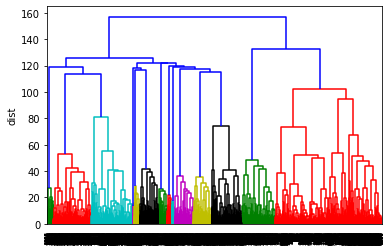

In [ ]:
# 계층형 클러스터링을 이용한 그룹 분할
# scipy: 과학기술계산을 위한 라이브러리
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

hcls = linkage(bank_df2_sc, metric='euclidean', method='ward')
dendrogram(hcls)

plt.ylabel('dist')
plt.show()

In [ ]:
# 고객별 그룹 확인
from scipy.cluster.hierarchy import fcluster

cst_group = fcluster(hcls, 100, criterion='distance')
print(cst_group)

[14 14 14 ... 12 12 12]


In [ ]:
# k-Means를 이용한 그룹 분할
from sklearn.cluster import KMeans

# 데이터를 10개로 분할
kcls = KMeans(n_clusters=10)
cst_group = kcls.fit_predict(bank_df2_sc)

print(cst_group)

[3 3 3 ... 0 0 0]


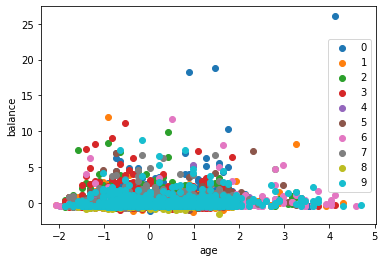

In [ ]:
# 클러스터 ID별 데이터 분포 확인
for i in range(10):
  labels = bank_df2_sc[cst_group == i]
  plt.scatter(labels['age'], labels['balance'], label=i)

plt.legend()
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [ ]:
bank_df2_sc['group'] = cst_group
bank_df2_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,-1.080389,1.482027,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,3
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,1.584418,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,3
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,3
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,3
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,1.584418,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,3


In [ ]:
# 그룹별 데이터 건수 확인
print(bank_df2_sc['group'].value_counts())

3    1684
1    1058
9     966
2     846
7     737
0     632
5     458
6     238
4     186
8     128
Name: group, dtype: int64


In [ ]:
# 각 그룹의 통계량 계산 및 성질 파악
bank_df2_sc[bank_df2_sc['group']==0].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,632.000000,6.320000e+02,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,6.320000e+02,6.320000e+02,6.320000e+02,6.320000e+02,632.000000,6.320000e+02,6.320000e+02,6.320000e+02,632.000000,6.320000e+02,6.320000e+02,632.0
mean,0.155367,-1.371485e-01,0.504999,-0.007470,0.054201,0.331854,-0.026387,-0.251652,0.010674,0.091638,0.046552,0.056822,-0.094784,-0.119643,-0.042484,0.137453,0.437450,0.209427,-0.580665,-0.250258,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-0.430402,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.111419,-1.349488e-01,-1.120725e-01,0.0
std,0.931557,3.055532e-16,1.908348,1.001750,1.047200,0.439199,0.987776,0.461960,0.722962,0.847491,1.054018,0.987635,0.949784,0.866273,1.003177,1.045849,0.722408,1.299082,0.292336,0.165099,2.611091e-15,3.333307e-16,2.777756e-16,1.138880e-15,0.108793,4.833295e-15,1.124991e-15,5.555512e-15,0.193507,9.722146e-16,3.888858e-16,0.0
min,-1.964393,-1.371485e-01,-1.063086,-1.140627,-0.444540,-1.758049,-0.957063,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-0.256826,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,-0.320275,-1.349488e-01,-1.120725e-01,0.0
25%,-0.633545,-1.371485e-01,-0.340549,-1.140627,-0.444540,0.293287,-0.616951,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,0.723928,-0.266889,-0.619542,-0.256826,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0
50%,0.031879,-1.371485e-01,-0.055695,0.876711,-0.444540,0.413954,-0.355111,-0.238367,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,0.723928,-0.266889,-0.619542,-0.256826,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0
75%,0.887424,-1.371485e-01,0.715065,0.876711,-0.444540,0.534620,0.235659,-0.238367,0.545464,0.232436,-0.362951,0.818657,-0.631147,-0.417717,0.925593,1.482027,0.723928,-0.266889,-0.619542,-0.256826,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0
max,4.119482,-1.371485e-01,26.055019,0.876711,2.249514,1.741289,7.160898,2.448242,4.170989,6.200873,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,1.614095,3.893692,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,2.300280,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0


In [ ]:
bank_df2_sc[bank_df2_sc['group']==1].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,1058.000000,1.058000e+03,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1058.0
mean,-0.025804,-1.371485e-01,-0.148818,-0.194880,0.398307,0.338565,0.017030,0.242835,-0.359488,-0.262455,0.014291,0.033828,-0.046891,0.034065,0.013611,-0.040765,0.409528,0.199739,-0.545650,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,2.300280e+00,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,1.0
std,0.996979,1.916040e-15,0.720006,1.007180,1.249704,1.048946,1.015046,1.342658,0.338029,0.304466,1.017331,0.993056,0.976731,1.033039,0.999326,0.983028,0.750723,1.287151,0.399672,6.109114e-16,7.664162e-15,5.137210e-16,8.330611e-16,1.471741e-15,2.887945e-14,8.052924e-15,1.804966e-15,6.886638e-15,6.109114e-15,1.360666e-15,2.957367e-15,0.0
min,-2.059453,-1.371485e-01,-1.193640,-1.140627,-0.444540,-1.758049,-0.964517,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,2.300280e+00,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,1.0
25%,-0.823666,-1.371485e-01,-0.447848,-1.140627,-0.444540,-0.672048,-0.610428,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,2.300280e+00,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,1.0
50%,-0.158242,-1.371485e-01,-0.373922,-1.140627,-0.444540,0.293287,-0.312247,-0.238367,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,2.300280e+00,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,1.0
75%,0.697303,-1.371485e-01,-0.132804,0.876711,2.249514,1.258621,0.260818,0.433285,-0.418664,-0.310149,-0.362951,0.818657,1.584418,-0.417717,0.925593,1.482027,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,2.300280e+00,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,1.0
max,4.309603,-1.371485e-01,12.044901,0.876711,2.249514,1.861955,9.054343,13.866330,3.467979,4.573118,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,1.614095,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,2.300280e+00,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,1.0


In [ ]:
bank_df2_sc[bank_df2_sc['group']==2].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,846.000000,8.460000e+02,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,8.460000e+02,8.460000e+02,8.460000e+02,846.000000,846.000000,846.000000,846.000000,846.000000,8.460000e+02,8.460000e+02,846.0
mean,-0.152849,-1.371485e-01,0.031094,0.471336,-0.119725,-0.122486,0.096195,-0.242734,1.555119,0.849418,-0.049663,-0.054323,0.094280,0.034279,0.036417,-0.065449,0.577105,0.003541,-0.614262,1.838057,-0.377469,-6.367914e-02,-2.678184e-01,-1.674064e-01,-0.415332,-0.310110,-0.040722,0.341944,-0.312137,-1.349488e-01,-1.120725e-01,2.0
std,0.944133,1.333056e-15,0.948515,0.808840,0.877767,0.819381,1.064246,0.462235,1.592794,1.742012,0.937960,1.010019,1.040320,1.033359,0.997102,0.971595,0.536550,1.006732,0.108539,2.076394,0.202234,2.082900e-16,2.332848e-15,1.333056e-15,0.229647,0.362195,0.772641,1.083748,0.167285,1.221968e-15,1.999584e-15,0.0
min,-1.869332,-1.371485e-01,-0.762484,-1.140627,-0.444540,-1.758049,-0.957063,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-0.256826,-0.391400,-6.367914e-02,-2.678184e-01,-1.674064e-01,-0.434730,-0.351657,-0.100262,-0.662104,-0.320275,-1.349488e-01,-1.120725e-01,2.0
25%,-0.823666,-1.371485e-01,-0.407376,0.876711,-0.444540,-0.913382,-0.554519,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,0.723928,-0.266889,-0.619542,-0.256826,-0.391400,-6.367914e-02,-2.678184e-01,-1.674064e-01,-0.434730,-0.351657,-0.100262,-0.662104,-0.320275,-1.349488e-01,-1.120725e-01,2.0
50%,-0.348363,-1.371485e-01,-0.277801,0.876711,-0.444540,-0.068714,-0.198566,-0.238367,1.966549,0.232436,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,0.723928,-0.266889,-0.619542,3.893692,-0.391400,-6.367914e-02,-2.678184e-01,-1.674064e-01,-0.434730,-0.351657,-0.100262,-0.662104,-0.320275,-1.349488e-01,-1.120725e-01,2.0
75%,0.317060,-1.371485e-01,0.036917,0.876711,-0.444540,0.293287,0.324181,-0.238367,3.036129,1.317606,-0.362951,0.818657,1.584418,-0.417717,0.925593,1.482027,0.723928,-0.266889,-0.619542,3.893692,-0.391400,-6.367914e-02,-2.678184e-01,-1.674064e-01,-0.434730,-0.351657,-0.100262,1.510337,-0.320275,-1.349488e-01,-1.120725e-01,2.0
max,3.454058,-1.371485e-01,9.874761,0.876711,2.249514,1.741289,9.717795,3.119894,7.906987,19.765504,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,1.614095,3.893692,2.554934,-6.367914e-02,-2.678184e-01,-1.674064e-01,2.300280,2.843677,9.973879,1.510337,3.122313,-1.349488e-01,-1.120725e-01,2.0


In [ ]:
bank_df2_sc[bank_df2_sc['group']==3].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,1684.000000,1.684000e+03,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1.684000e+03,1684.000000,1.684000e+03,1.684000e+03,1.684000e+03,1.684000e+03,1.684000e+03,1.684000e+03,1684.000000,1.684000e+03,1.684000e+03,1.684000e+03,1684.0
mean,-0.194596,-1.371485e-01,-0.089500,0.643112,-0.049391,0.077605,0.027194,-0.107547,-0.409301,-0.300161,0.027742,-0.022125,0.004315,0.049783,0.181093,-0.232894,-0.793775,-0.164400,0.933658,-2.568256e-01,-0.389650,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,1.509047,-3.202754e-01,-1.349488e-01,-1.120725e-01,3.0
std,0.882583,2.804146e-15,0.815311,0.645699,0.953389,0.937924,0.964045,0.686477,0.099054,0.106162,1.032584,1.004501,1.002343,1.047166,0.969397,0.870748,0.944616,0.633325,1.028340,9.162061e-15,0.071798,9.856156e-16,6.885427e-15,9.717337e-16,7.218593e-15,9.828392e-15,1.249372e-15,0.052939,1.121658e-14,1.582538e-15,4.372802e-15,0.0
min,-1.869332,-1.371485e-01,-0.935142,-1.140627,-0.444540,-1.396049,-0.968244,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-2.568256e-01,-0.391400,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-0.662104,-3.202754e-01,-1.349488e-01,-1.120725e-01,3.0
25%,-0.823666,-1.371485e-01,-0.431203,0.876711,-0.444540,-0.792715,-0.543337,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-2.568256e-01,-0.391400,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,1.510337,-3.202754e-01,-1.349488e-01,-1.120725e-01,3.0
50%,-0.348363,-1.371485e-01,-0.331492,0.876711,-0.444540,-0.068714,-0.241430,-0.238367,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-2.568256e-01,-0.391400,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,1.510337,-3.202754e-01,-1.349488e-01,-1.120725e-01,3.0
75%,0.412121,-1.371485e-01,-0.074299,0.876711,-0.444540,0.896621,0.235659,0.097459,-0.418664,-0.310149,-0.362951,0.818657,1.584418,-0.417717,0.925593,-0.674752,0.723928,-0.266889,1.614095,-2.568256e-01,-0.391400,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,1.510337,-3.202754e-01,-1.349488e-01,-1.120725e-01,3.0
max,4.119482,-1.371485e-01,11.094792,0.876711,2.249514,1.741289,11.566513,6.478155,1.348905,1.317606,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,1.614095,-2.568256e-01,2.554934,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,1.510337,-3.202754e-01,-1.349488e-01,-1.120725e-01,3.0


In [ ]:
bank_df2_sc[bank_df2_sc['group']==4].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,186.000000,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,1.860000e+02,1.860000e+02,186.000000,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,186.0
mean,-0.007474,-1.371485e-01,-0.121436,-0.338030,0.004469,1.430539,0.080056,-0.352115,0.213559,0.387044,0.005861,-0.124647,0.131198,-0.175852,0.019666,0.113748,0.486235,0.121539,-0.583516,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,5.973486e+00,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,4.0
std,1.011380,5.009488e-16,0.569680,0.990059,1.006725,0.583469,1.163647,0.295936,1.047784,1.998527,1.009687,1.019937,1.055388,0.790512,1.000978,1.041499,0.668066,1.189871,0.282135,4.452878e-16,7.235927e-16,0.000000,8.349147e-16,2.493612e-14,3.896269e-16,8.905757e-16,3.757116e-16,1.892473e-15,7.792537e-16,4.731183e-16,2.365592e-16,0.0
min,-1.394029,-1.371485e-01,-0.614305,-1.140627,-0.444540,-1.034048,-0.893699,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,5.973486e+00,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,4.0
25%,-0.894961,-1.371485e-01,-0.410232,-1.140627,-0.444540,1.499955,-0.527496,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,5.973486e+00,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,4.0
50%,-0.253303,-1.371485e-01,-0.296895,-1.140627,-0.444540,1.620622,-0.245157,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,5.973486e+00,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,4.0
75%,0.792363,-1.371485e-01,-0.031298,0.876711,-0.444540,1.620622,0.251500,-0.238367,1.100340,0.232436,-0.362951,0.818657,1.584418,-0.417717,0.925593,1.482027,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,5.973486e+00,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,4.0
max,2.218271,-1.371485e-01,5.236164,0.876711,2.249514,1.741289,9.345069,1.104937,5.054773,21.393260,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,1.614095,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,5.973486e+00,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,4.0


In [ ]:
bank_df2_sc[bank_df2_sc['group']==5].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,458.000000,4.580000e+02,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,458.0
mean,0.055540,-1.371485e-01,-0.068526,-0.220051,-0.091607,-1.171050,-0.024606,-0.153311,0.298248,0.286931,-0.002118,-0.063337,0.070288,-0.098487,0.001440,0.073999,0.530867,0.101185,-6.195420e-01,-2.568256e-01,-3.913996e-01,-6.367914e-02,3.733873e+00,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,5.0
std,1.029377,1.083651e-15,0.782390,1.005913,0.909982,0.648058,1.110100,0.669927,1.103280,1.376529,0.998552,1.011800,1.031691,0.892977,1.000981,1.027895,0.608262,1.159663,4.668036e-15,1.778299e-15,2.056159e-15,7.918989e-16,6.668622e-15,8.335778e-16,1.945015e-15,1.778299e-15,4.862537e-16,4.334604e-15,8.335778e-16,5.835044e-16,2.917522e-16,0.0
min,-1.869332,-1.371485e-01,-0.923719,-1.140627,-0.444540,-1.758049,-0.953335,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-6.195420e-01,-2.568256e-01,-3.913996e-01,-6.367914e-02,3.733873e+00,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,5.0
25%,-0.728606,-1.371485e-01,-0.406560,-1.140627,-0.444540,-1.516716,-0.628132,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,0.723928,-0.266889,-6.195420e-01,-2.568256e-01,-3.913996e-01,-6.367914e-02,3.733873e+00,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,5.0
50%,-0.158242,-1.371485e-01,-0.300485,-1.140627,-0.444540,-1.396049,-0.336475,-0.238367,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,0.723928,-0.266889,-6.195420e-01,-2.568256e-01,-3.913996e-01,-6.367914e-02,3.733873e+00,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,5.0
75%,0.792363,-1.371485e-01,-0.068343,0.876711,-0.444540,-1.154715,0.132228,0.097459,1.459378,0.232436,-0.362951,0.818657,1.584418,-0.417717,0.925593,1.482027,0.723928,-0.266889,-6.195420e-01,-2.568256e-01,-3.913996e-01,-6.367914e-02,3.733873e+00,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,5.0
max,3.358998,-1.371485e-01,7.195459,0.876711,2.249514,1.379288,9.363706,5.806503,5.165246,14.339652,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,-6.195420e-01,-2.568256e-01,-3.913996e-01,-6.367914e-02,3.733873e+00,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,5.0


In [ ]:
bank_df2_sc[bank_df2_sc['group']==6].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,238.000000,2.380000e+02,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,2.380000e+02,2.380000e+02,238.000000,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,238.000000,2.380000e+02,238.000000,238.000000,238.0
mean,0.464444,-1.371485e-01,0.292868,-0.750721,-0.252108,-0.095078,0.223099,-0.325851,0.567238,0.686110,-0.035415,-0.184283,0.225290,-0.039676,-0.279682,0.331141,0.255105,0.373963,-0.478767,-2.568256e-01,-3.913996e-01,1.791310,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-0.662104,-3.202754e-01,3.796145,3.152628,6.0
std,1.586021,4.728392e-16,1.333135,0.798262,0.695287,1.046111,1.262308,0.388911,1.355279,1.650344,0.958061,1.022090,1.081165,0.961196,0.984451,1.078217,0.877751,1.473315,0.543936,9.456784e-16,2.781407e-16,5.090804,9.456784e-16,1.946985e-16,1.390704e-15,1.001307e-15,4.589322e-16,0.000000,7.787940e-16,3.777194,4.349408,0.0
min,-2.059453,-1.371485e-01,-0.463841,-1.140627,-0.444540,-1.758049,-0.960790,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-0.662104,-3.202754e-01,-0.134949,-0.112073,6.0
25%,-0.823666,-1.371485e-01,-0.360948,-1.140627,-0.444540,-1.034048,-0.482769,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-0.662104,-3.202754e-01,-0.134949,-0.112073,6.0
50%,0.031879,-1.371485e-01,-0.108896,-1.140627,-0.444540,-0.189381,-0.107248,-0.574193,0.173873,0.232436,-0.362951,0.818657,-0.631147,-0.417717,-1.080389,-0.674752,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-0.662104,-3.202754e-01,7.410215,-0.112073,6.0
75%,1.838029,-1.371485e-01,0.376848,-1.140627,-0.444540,0.775954,0.420158,-0.238367,1.429249,1.317606,-0.362951,0.818657,1.584418,-0.417717,0.925593,1.482027,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-0.662104,-3.202754e-01,7.410215,8.922795,6.0
max,4.594785,-1.371485e-01,11.750828,0.876711,2.249514,1.741289,11.260878,2.112416,8.127933,10.541555,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,1.614095,-2.568256e-01,-3.913996e-01,15.703730,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-0.662104,-3.202754e-01,7.410215,8.922795,6.0


In [ ]:
bank_df2_sc[bank_df2_sc['group']==7].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,737.000000,7.370000e+02,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,7.370000e+02,7.370000e+02,7.370000e+02,7.370000e+02,7.370000e+02,7.370000e+02,7.370000e+02,7.370000e+02,7.370000e+02,7.370000e+02,7.370000e+02,7.370000e+02,737.0
mean,0.146674,-1.371485e-01,0.047010,-0.275662,-0.071686,-0.504555,-0.080890,0.163075,-0.354863,-0.254198,0.030519,0.002036,-0.023896,0.185059,-0.108699,-0.025084,-1.104268,-0.217875,1.292840,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,7.0
std,0.930273,8.887816e-16,0.822379,0.999058,0.930938,0.905580,0.986948,1.393024,0.347108,0.304737,1.036114,1.000267,0.988927,1.154679,1.003183,0.990177,0.712219,0.441129,0.784346,2.110856e-15,3.888419e-16,2.777442e-17,1.444270e-15,1.249849e-15,4.666103e-15,3.644005e-14,1.374834e-15,5.999276e-15,8.332327e-16,1.110977e-15,1.291511e-15,0.0
min,-1.869332,-1.371485e-01,-0.727561,-1.140627,-0.444540,-1.758049,-0.964517,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,7.0
25%,-0.538484,-1.371485e-01,-0.393342,-1.140627,-0.444540,-1.396049,-0.647700,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,1.614095,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,7.0
50%,0.031879,-1.371485e-01,-0.229170,-1.140627,-0.444540,-0.551381,-0.386793,-0.238367,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,1.614095,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,7.0
75%,0.887424,-1.371485e-01,0.147153,0.876711,-0.444540,0.293287,0.146205,0.097459,-0.418664,-0.310149,-0.362951,0.818657,1.584418,-0.417717,0.925593,1.482027,-1.381354,-0.266889,1.614095,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,7.0
max,2.883695,-1.371485e-01,6.759733,0.876711,2.249514,1.741289,8.789708,12.858852,3.648753,2.945362,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,1.614095,-2.568256e-01,-3.913996e-01,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,7.0


In [ ]:
bank_df2_sc[bank_df2_sc['group']==8].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,128.000000,1.280000e+02,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000,128.000000,1.280000e+02,1.280000e+02,128.0
mean,-0.092888,7.291369e+00,-0.497025,-0.100437,0.502588,0.240495,-0.061560,0.267996,-0.286693,-0.238087,0.075538,-0.042039,-0.008019,-0.066257,0.157678,-0.118707,-0.114895,-0.172817,0.218072,-0.224400,-0.069144,-0.063679,-0.080239,-0.023479,0.355859,0.022796,-1.002619e-01,-0.000188,0.029362,-1.349488e-01,-1.120725e-01,8.0
std,0.904876,1.159169e-14,0.193048,1.012138,1.291353,1.097265,0.874093,1.319289,0.636903,0.463665,1.088232,1.011515,1.000052,0.933530,0.978885,0.947147,1.034746,0.609621,1.085604,0.366857,0.923191,0.000000,0.849165,0.932696,1.244726,1.031797,2.089848e-16,1.003849,1.043996,2.786464e-17,2.089848e-16,0.0
min,-1.584150,7.291369e+00,-1.530144,-1.140627,-0.444540,-1.758049,-0.968244,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-0.256826,-0.391400,-0.063679,-0.267818,-0.167406,-0.434730,-0.351657,-1.002619e-01,-0.662104,-0.320275,-1.349488e-01,-1.120725e-01,8.0
25%,-0.918727,7.291369e+00,-0.549354,-1.140627,-0.444540,-0.792715,-0.590860,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-0.256826,-0.391400,-0.063679,-0.267818,-0.167406,-0.434730,-0.351657,-1.002619e-01,-0.662104,-0.320275,-1.349488e-01,-1.120725e-01,8.0
50%,-0.253303,7.291369e+00,-0.448827,0.876711,-0.444540,0.413954,-0.360702,-0.238367,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,0.723928,-0.266889,-0.619542,-0.256826,-0.391400,-0.063679,-0.267818,-0.167406,-0.434730,-0.351657,-1.002619e-01,-0.662104,-0.320275,-1.349488e-01,-1.120725e-01,8.0
75%,0.602242,7.291369e+00,-0.443932,0.876711,2.249514,1.379288,0.135023,0.433285,-0.418664,-0.310149,-0.362951,0.818657,1.584418,-0.417717,0.925593,1.482027,0.723928,-0.266889,1.614095,-0.256826,-0.391400,-0.063679,-0.267818,-0.167406,2.300280,-0.351657,-1.002619e-01,1.510337,-0.320275,-1.349488e-01,-1.120725e-01,8.0
max,1.838029,7.291369e+00,0.336131,0.876711,2.249514,1.861955,4.827637,7.485634,3.096387,4.573118,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,1.614095,3.893692,2.554934,-0.063679,3.733873,5.973486,2.300280,2.843677,-1.002619e-01,1.510337,3.122313,-1.349488e-01,-1.120725e-01,8.0


In [ ]:
bank_df2_sc[bank_df2_sc['group']==9].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,966.000000,9.660000e+02,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,9.660000e+02,966.000000,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,966.000000,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,966.0
mean,0.160791,-1.371485e-01,-0.024902,-0.737577,-0.187964,0.040336,-0.121884,0.359584,-0.275224,-0.147261,-0.075669,0.115369,-0.071522,-0.117921,-0.208223,0.314330,0.593165,-0.046673,-0.603356,-2.568256e-01,2.359732,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,0.567176,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,9.0
std,1.050947,1.693967e-15,0.843471,0.807039,0.791232,0.970277,0.826389,1.298962,0.477555,0.609811,0.902274,0.970148,0.963154,0.868236,0.994937,1.075242,0.508391,0.914477,0.189548,2.221596e-15,0.733201,4.026643e-16,2.776995e-15,1.416268e-15,5.720610e-15,7.608967e-15,2.506970,6.664789e-15,4.054413e-15,1.305188e-15,2.596491e-15,0.0
min,-1.869332,-1.371485e-01,-0.630298,-1.140627,-0.444540,-1.758049,-0.979426,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-2.568256e-01,-0.391400,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-0.100262,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,9.0
25%,-0.728606,-1.371485e-01,-0.420595,-1.140627,-0.444540,-0.913382,-0.628132,-0.238367,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,0.723928,-0.266889,-0.619542,-2.568256e-01,2.554934,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-0.100262,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,9.0
50%,-0.063182,-1.371485e-01,-0.307665,-1.140627,-0.444540,-0.189381,-0.388656,-0.238367,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,-1.080389,-0.674752,0.723928,-0.266889,-0.619542,-2.568256e-01,2.554934,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-0.100262,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,9.0
75%,0.887424,-1.371485e-01,0.017497,-1.140627,-0.444540,0.775954,0.063273,0.433285,-0.418664,-0.310149,-0.362951,0.818657,1.584418,-0.417717,0.925593,1.482027,0.723928,-0.266889,-0.619542,-2.568256e-01,2.554934,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-0.100262,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,9.0
max,4.689845,-1.371485e-01,8.831305,0.876711,2.249514,1.861955,5.994267,11.851374,3.467979,5.115703,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,1.614095,-2.568256e-01,2.554934,-6.367914e-02,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,9.973879,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,9.0


In [ ]:
# PCA를 이용한 신규변수 작성
from sklearn.decomposition import PCA

# 누적 기여율이 80%에 도달할 때까지의 주성분을 추출
pca = PCA(0.80)
bank_df2_pca = pca.fit_transform(bank_df2_sc)

# 추출한 주성분 수 확인
print(pca.n_components_)

# 주성분 순석을 적용한 후의 데이터의 크기를 확인(데이터의 열수가 32에서 17로 압축됨)
print(bank_df2_pca.shape)

17
(6933, 17)


In [ ]:
# 목적변수(예측할 변수)별 분포 확인
# 데이터에서 목적변수 y만 추출
y= pd.read_csv('/content/drive/MyDrive/chap3_4_6_7_A1-5/chap3-4/data/data/bank-prep.csv', sep=',')['y']

bank_df2_pca = pd.DataFrame(bank_df2_pca)
bank_df2_pca['y'] = y

print(bank_df2_pca.shape)

(6933, 18)


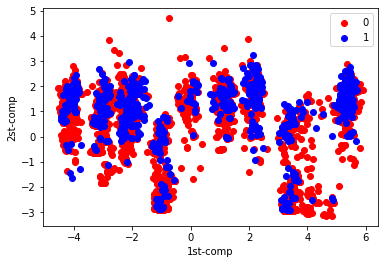

In [ ]:
# 목적변수별 산포도 확인
import matplotlib.pyplot as plt
%matplotlib inline

# y가 0인 제1주성분과 제2주성분을 산포도로 작성
bank_df2_pca_0 = bank_df2_pca[bank_df2_pca['y']==0]
bank_df2_pca_0 = bank_df2_pca_0.drop('y', axis=1)
plt.scatter(bank_df2_pca_0[0], bank_df2_pca_0[1], c='red', label=0)

# y가 1인 제1주성분과 제2주성분을 산포도로 작성
bank_df2_pca_1 = bank_df2_pca[bank_df2_pca['y']==1]
bank_df2_pca_1 = bank_df2_pca_1.drop('y', axis=1)
plt.scatter(bank_df2_pca_1[0], bank_df2_pca_1[1], c='blue', label=1)

plt.legend()
plt.xlabel('1st-comp')
plt.ylabel('2st-comp')
plt.show()